In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_test['Transported'] = False
df_id = df_test['PassengerId']
df = pd.concat([df_train, df_test], sort = False)
df.drop(['Name', 'PassengerId'], axis = 1, inplace = True)
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [63]:
df_id

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [64]:
dataset_df_test = df_test.drop(['PassengerId', 'Name'], axis=1)
dataset_df_test.head(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,False
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,False
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,False
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,False


In [65]:
df.shape[0] == df_train.shape[0] + df_test.shape[0]


True

In [66]:
df['cabin_deck'] = df['Cabin'].str.extract(r'([A-Z])')  # captures the deck (first character)
df['cabin_num'] = df['Cabin'].str.extract(r'(\d+)')      # captures the numerical part
df['cabin_side'] = df['Cabin'].str.extract(r'([PS])$')   # captures the side (last character)
df = df.drop(columns = ['Cabin'])


#Here are four visualizations based on the passenger data:

Passenger Distribution by HomePlanet: Most passengers are from Earth, with fewer from Europa and Mars.

CryoSleep Status: There's a fairly even split between passengers in CryoSleep and those who are not.

Distribution of Passengers: Passenger ages are spread out, with some concentration in their 20s and 30s.

Total Spending on Amenities: The highest spending is in the FoodCourt, followed by the Spa, with much less spending in other areas like RoomService and ShoppingMall.

These insights can help identify trends in passenger behavior and preferences.

C:\Users\Pushkar Taneja\AppData\Local\Temp\ipykernel_70504\2307276578.py:11: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(x='HomePlanet', data=dataset_df_test, hue='HomePlanet', palette=palette_homeplanet)
C:\Users\Pushkar Taneja\AppData\Local\Temp\ipykernel_70504\2307276578.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=spending.index, y=spending.values, palette=bar_colors)


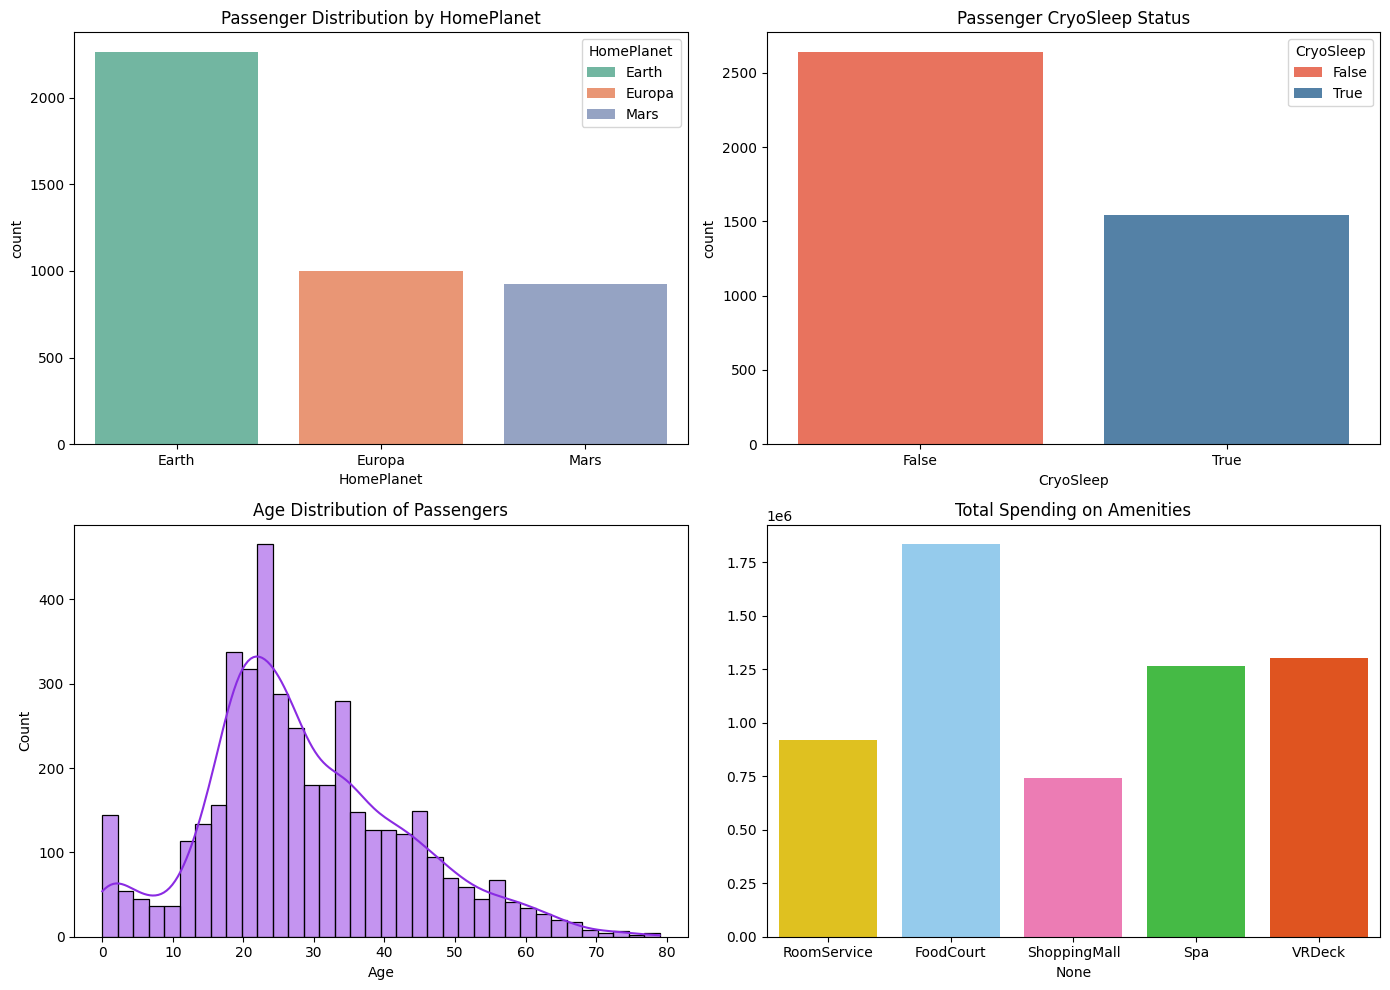

In [67]:
plt.figure(figsize=(14, 10))

# Custom colors
palette_homeplanet = sns.color_palette("Set2")  # Different colors for HomePlanet
palette_cryosleep = ['#FF6347', '#4682B4']  # Custom colors for CryoSleep (True/False)
hist_color = '#8A2BE2'  # Purple color for Age distribution
bar_colors = ['#FFD700', '#87CEFA', '#FF69B4', '#32CD32', '#FF4500']  # Custom colors for spending

# Plot 1: Distribution of passengers by HomePlanet
plt.subplot(2, 2, 1)
sns.countplot(x='HomePlanet', data=dataset_df_test, hue='HomePlanet', palette=palette_homeplanet)
plt.title('Passenger Distribution by HomePlanet')

# Plot 2: CryoSleep status
plt.subplot(2, 2, 2)
sns.countplot(x='CryoSleep', data=dataset_df_test, hue='CryoSleep',palette=palette_cryosleep)
plt.title('Passenger CryoSleep Status')

# Plot 3: Passenger Age Distribution
plt.subplot(2, 2, 3)
sns.histplot(dataset_df_test['Age'].dropna(), kde=True, color=hist_color)
plt.title('Age Distribution of Passengers')

# Plot 4: Spending on Various Amenities
plt.subplot(2, 2, 4)
spending = dataset_df_test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum()
sns.barplot(x=spending.index, y=spending.values, palette=bar_colors)
plt.title('Total Spending on Amenities')

plt.tight_layout()
plt.show()

#  Age vs Spending Analysis

C:\Users\Pushkar Taneja\AppData\Local\Temp\ipykernel_70504\2028071946.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='RoomService', data=dataset_df_test, palette="coolwarm")
C:\Users\Pushkar Taneja\AppData\Local\Temp\ipykernel_70504\2028071946.py:19: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='AgeGroup', y='FoodCourt', data=dataset_df_test,hue='CryoSleep', palette=palette_homeplanet, legend=False)
C:\Users\Pushkar Taneja\AppData\Local\Temp\ipykernel_70504\2028071946.py:29: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(x='AgeGroup', y='Spa', data=dataset_df_test,hue='CryoSleep', palette=bar_colors, legend=False)


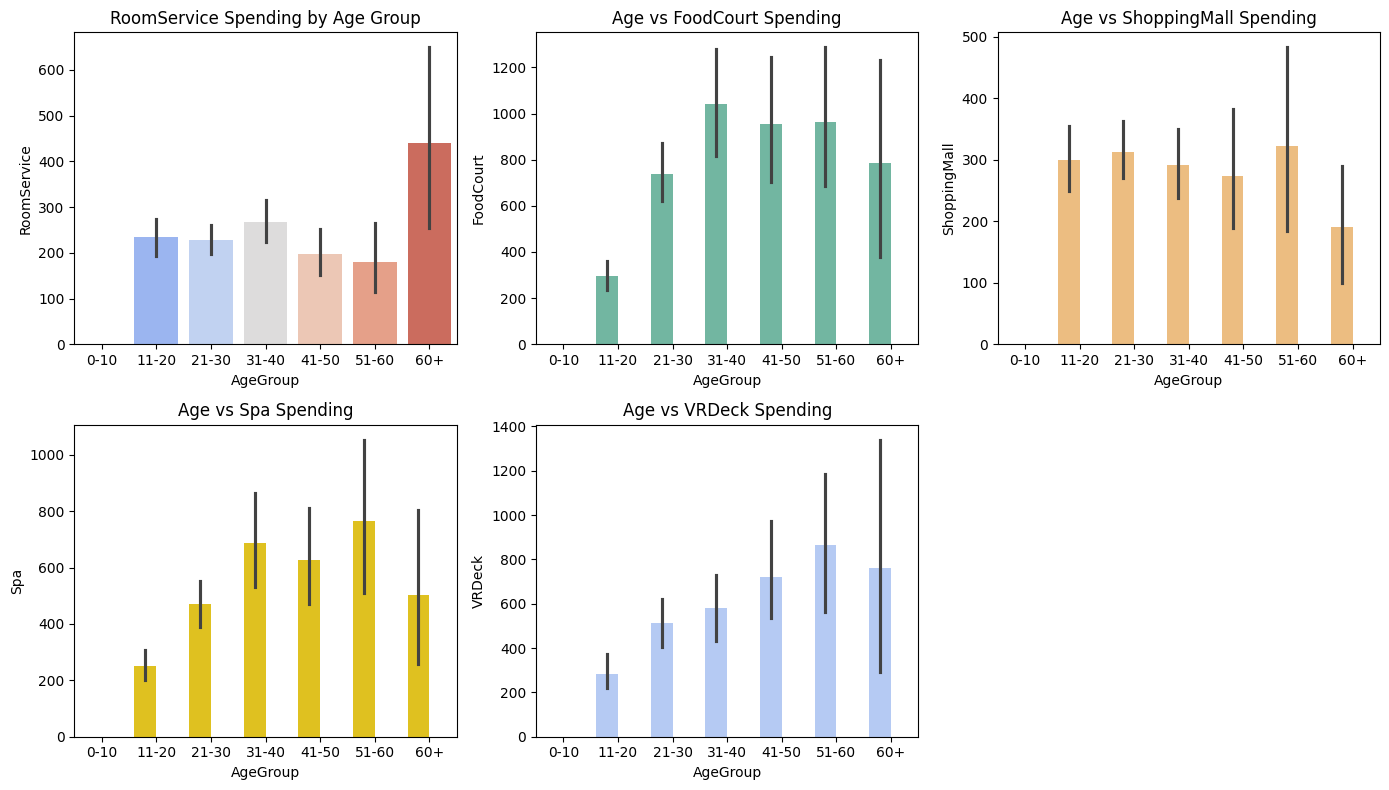

In [68]:
# Plotting Age vs Spending on individual amenities

plt.figure(figsize=(14, 8))

# Define the age bins and labels
bins = [0, 10, 20, 30, 40, 50, 60, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '60+']

# Add a new column 'AgeGroup' by binning 'Age'
dataset_df_test['AgeGroup'] = pd.cut(dataset_df_test['Age'], bins=bins, labels=labels)

# Plotting RoomService spending by AgeGroup using a boxplot
plt.subplot(2, 3, 1)
sns.barplot(x='AgeGroup', y='RoomService', data=dataset_df_test, palette="coolwarm")
plt.title('RoomService Spending by Age Group')

# Plot 2: Age vs FoodCourt Spending
plt.subplot(2, 3, 2)
sns.barplot(x='AgeGroup', y='FoodCourt', data=dataset_df_test,hue='CryoSleep', palette=palette_homeplanet, legend=False)
plt.title('Age vs FoodCourt Spending')

# Plot 3: Age vs ShoppingMall Spending
plt.subplot(2, 3, 3)
sns.barplot(x='AgeGroup', y='ShoppingMall', data=dataset_df_test,hue='CryoSleep', palette='Spectral', legend=False)
plt.title('Age vs ShoppingMall Spending')

# Plot 4: Age vs Spa Spending
plt.subplot(2, 3, 4)
sns.barplot(x='AgeGroup', y='Spa', data=dataset_df_test,hue='CryoSleep', palette=bar_colors, legend=False)
plt.title('Age vs Spa Spending')

# Plot 5: Age vs VRDeck Spending
plt.subplot(2, 3, 5)
sns.barplot(x='AgeGroup', y='VRDeck', data=dataset_df_test,hue='CryoSleep', palette='coolwarm', legend=False)
plt.title('Age vs VRDeck Spending')

plt.tight_layout()
plt.show()

In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import SimpleImputer


In [70]:
ohe = OneHotEncoder(drop='first')
ord = OrdinalEncoder(categories=[['P','S']])
scale = StandardScaler()
df['cabin_deck'] = df['cabin_deck'].map({'G' : 0, 'F' : 1, 'E' : 2, 'D' : 3, 'C' : 4, 'B' : 5, 'A' : 6, 'U' : 7, 'T' : 8})
si = SimpleImputer()

In [71]:
df.isnull().mean()*100

HomePlanet      2.220509
CryoSleep       2.390131
Destination     2.112567
Age             2.081727
VIP             2.282190
RoomService     2.027756
FoodCourt       2.228219
ShoppingMall    2.359291
Spa             2.189668
VRDeck          2.066307
Transported     0.000000
cabin_deck      2.305320
cabin_num       2.305320
cabin_side      2.305320
dtype: float64

In [72]:
df = df.dropna(axis=0)

In [73]:
df.isnull().mean()*100

HomePlanet      0.0
CryoSleep       0.0
Destination     0.0
Age             0.0
VIP             0.0
RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
Transported     0.0
cabin_deck      0.0
cabin_num       0.0
cabin_side      0.0
dtype: float64

In [74]:
clf = ColumnTransformer(transformers=[
    ('ohe', ohe, ['HomePlanet','Destination','CryoSleep','VIP']),
    ('ord', ord, ['cabin_side']),
    ('std', scale , ['RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck']),
],remainder='passthrough')

In [75]:
df1 = clf.fit_transform(df)

In [76]:
clf.named_transformers_['ohe'].get_feature_names_out(['HomePlanet', 'Destination', 'CryoSleep','VIP'])

array(['HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
       'CryoSleep_True', 'VIP_True'], dtype=object)

In [77]:
clf.named_transformers_['ord'].get_feature_names_out(['cabin_side'])

array(['cabin_side'], dtype=object)

In [78]:
df1 = pd.DataFrame(df1,columns= ['HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
       'CryoSleep_True','VIP_True', 'cabin_side_S','Age','RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck','Transported','cabin_deck', 'cabin_num'])

In [79]:
df1

,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_True,VIP_True,cabin_side_S,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,cabin_deck,cabin_num
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.349392,-0.288375,-0.290101,-0.275058,-0.265118,39.0,False,5.0,0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.178286,-0.282798,-0.249515,0.213688,-0.226464,24.0,True,1.0,0
2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,-0.281891,1.927495,-0.290101,5.702956,-0.222072,58.0,False,6.0,0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.349392,0.506637,0.312186,2.688577,-0.095569,33.0,False,6.0,0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.126249,-0.244999,-0.044965,0.227932,-0.263361,16.0,True,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10114,0.0,0.0,0.0,1.0,1.0,0.0,1.0,-0.349392,-0.288375,-0.290101,-0.275058,-0.265118,43.0,False,0.0,1495
10115,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.275612,-0.288375,5.961665,-0.275058,-0.265118,43.0,False,3.0,278
10116,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.349392,0.247623,-0.290101,-0.272387,-0.265118,40.0,False,1.0,1796
10117,0.0,0.0,0.0,1.0,1.0,0.0,1.0,-0.349392,-0.288375,-0.290101,-0.275058,-0.265118,34.0,False,0.0,1496


In [80]:
df1 = df1.astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10119 entries, 0 to 10118
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   HomePlanet_Europa          10119 non-null  int64
 1   HomePlanet_Mars            10119 non-null  int64
 2   Destination_PSO J318.5-22  10119 non-null  int64
 3   Destination_TRAPPIST-1e    10119 non-null  int64
 4   CryoSleep_True             10119 non-null  int64
 5   VIP_True                   10119 non-null  int64
 6   cabin_side_S               10119 non-null  int64
 7   Age                        10119 non-null  int64
 8   RoomService                10119 non-null  int64
 9   FoodCourt                  10119 non-null  int64
 10  ShoppingMall               10119 non-null  int64
 11  Spa                        10119 non-null  int64
 12  VRDeck                     10119 non-null  int64
 13  Transported                10119 non-null  int64
 14  cabin_deck            

In [81]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [82]:
X_train = df1.drop(columns=['Transported'])
y_train = df1['Transported']

X_test = df1.drop(columns=['Transported'])
y_test = df1['Transported']

model_1 = LogisticRegression()
model_2 = DecisionTreeClassifier()
model_3 = RandomForestClassifier()
model_4 = XGBClassifier()
model_5 = LGBMClassifier()

In [83]:
X_train.shape

(10119, 15)

In [84]:
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)
print('accuracy score: ', accuracy_score(y_test, y_pred))

accuracy score:  0.718055143788912


c:\Users\Pushkar Taneja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [85]:
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)
print('accuracy score: ', accuracy_score(y_test, y_pred))

accuracy score:  0.9998023520110683


In [86]:
model_3.fit(X_train, y_train)
y_pred = model_3.predict(X_test)
print('accuracy score: ', accuracy_score(y_test, y_pred))

accuracy score:  0.9998023520110683


In [87]:
model_4.fit(X_train, y_train)
y_pred1 = model_4.predict(X_test)
print('accuracy score: ', accuracy_score(y_test, y_pred))

accuracy score:  0.9998023520110683


In [88]:
model_5.fit(X_train, y_train)
y_pred = model_5.predict(X_test)
print('accuracy score: ', accuracy_score(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3401, number of negative: 6718
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 426
[LightGBM] [Info] Number of data points in the train set: 10119, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.336100 -> initscore=-0.680721
[LightGBM] [Info] Start training from score -0.680721
accuracy score:  0.7996837632177093


In [89]:
y_pred1 = y_pred1[:len(df_id)]


In [90]:
submission = pd.DataFrame({'PassengerId': df_id.iloc[:len(y_pred1)], 'Transported': y_pred1})
submission.to_csv('submission.csv', index=False)
